In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn import metrics

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Breast_Cancer.csv')
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [ ]:
X = df.drop("Class", axis=1)
Y = df["Class"]
imputer = SimpleImputer(strategy='mean')

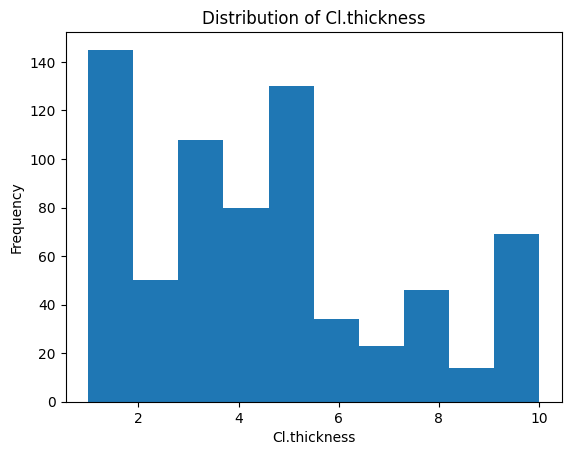

In [ ]:
#histogram
plt.hist(df['Cl.thickness'], bins=10)
plt.xlabel('Cl.thickness')
plt.ylabel('Frequency')
plt.title('Distribution of Cl.thickness')
plt.show()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Perform feature scaling using StandardScaler the aim of the StandardScaler is to center the feature values around zero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit and transform the imputer on the training set(imputer used to handle missing values in data)
X_train_scaled = imputer.fit_transform(X_train_scaled)

# Transform the testing set using the fitted imputer
X_test_scaled = imputer.transform(X_test_scaled)

In [ ]:
# Train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, Y_train)

# Train a Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, Y_train)

# Train a KNN Classification model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, Y_train)

# Access the predicted values for logistic regression
logistic_regression_predictions = logistic_regression_model.predict(X_test_scaled)
print("Logistic Regression Predictions:")
print(logistic_regression_predictions)

# Access the predicted values for linear regression
linear_regression_predictions = linear_regression_model.predict(X_test_scaled)
print("Linear Regression Predictions:")
print(linear_regression_predictions)

  # Access the predicted values for linear regression
  knn_predictions = knn_model.predict(X_test_scaled)
  print("knn Predictions:")
  print(knn_predictions)



Logistic Regression Predictions:
[0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0]
Linear Regression Predictions:
[ 8.23249185e-02  4.37027379e-02  3.33174642e-02  7.15940907e-01
  1.59230926e-01 -2.94332727e-02  1.59646270e-01  9.38082305e-01
  7.94122056e-01  3.14025820e-01  6.82311276e-04  7.09113773e-01
  1.25322695e-02  1.26594394e-01  1.15753397e-02  1.02374517e+00
 -6.90145524e-02  9.70328585e-01  7.33552097e-01  5.16867808e-01
  1.29405002e+00 -5.67424161e-02  5.12035969e-01 -6.50790148e-02
  8.55525055e-01  1.03684464e-01  2.25961878e-02  9.16493552e-01
  1.26734808e-01  8.00999442e-01  2.36269508e-02  3.44523653e-02
  4.39887411e-02  8.36888076e-01 -7.02568257e-02  8.52412617e-02
 -8.74155562e-03  1.19272288e+00 -8.21748095e-02  1.02182065e+00
 

In [ ]:
# Display the coefficients and form the logistic regression equation
coefficients = logistic_regression_model.coef_
intercept = logistic_regression_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.35882394  1.36324491  0.26906617  0.97564894  0.51860193  0.2981035
   1.42400929  0.8380279   0.01207334  0.58401863]]
Intercept: [-1.26173015]


In [ ]:
# Compute accuracy and confusion matrix for Logistic Regression model)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions.round())
logistic_regression_confusion_matrix = metrics.confusion_matrix(Y_test, logistic_regression_predictions.round())
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Confusion Matrix:")
print(logistic_regression_confusion_matrix)


Logistic Regression Accuracy: 0.9642857142857143
Logistic Regression Confusion Matrix:
[[94  1]
 [ 4 41]]


In [ ]:
# Compute accuracy and confusion matrix for KNN Classification model
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(Y_test, knn_predictions)
print("KNN Classification Accuracy:", knn_accuracy)
print("KNN Classification Confusion Matrix:")
print(knn_confusion_matrix)

KNN Classification Accuracy: 0.9714285714285714
KNN Classification Confusion Matrix:
[[94  1]
 [ 3 42]]


In [ ]:
# R-squared score
linear_regression_r2 = r2_score(Y_test, linear_regression_predictions)

print("Linear Regression R-squared Score:", linear_regression_r2)

Linear Regression R-squared Score: 0.8214061767952618
